In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
from collections import OrderedDict
from matplotlib.patches import Rectangle
import statistics
ff1.Cache.enable_cache('2023Baku') 
fp = ff1.get_session(2023, 'Baku', 'R')
fp_laps = fp.load_laps(with_telemetry=True)
fp.load()

In [29]:
#ricavo la lista di tutti i piloti
drivers = pd.unique(fp.laps['Driver'])
#elimino i tempi in cui i piloti erano in giro in o out
fp_laps = fp_laps.loc[(fp_laps['PitOutTime'].isnull() & fp_laps['PitInTime'].isnull() & fp_laps['IsAccurate'] == True)]

max_speed_dict_drs = dict.fromkeys(drivers)
max_speed_dict_no_drs = dict.fromkeys(drivers)

for driver in drivers:
    df_drs_on = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'] == 2) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 4) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 6) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 10) |
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 12)|
                                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 14)]

    df_drs_off = fp_laps.pick_driver(driver).get_car_data().loc[(fp_laps.pick_driver(driver).get_car_data()['DRS'] == 0) |
                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 1) |
                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 3)|
                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 5) |
                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 7)|
                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 9)|
                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 11) |
                                                    (fp_laps.pick_driver(driver).get_car_data()['DRS'] == 13) ]
    max_speed_dict_drs[driver] = max(df_drs_on['Speed'])
    max_speed_dict_no_drs[driver] = max(df_drs_off['Speed'])




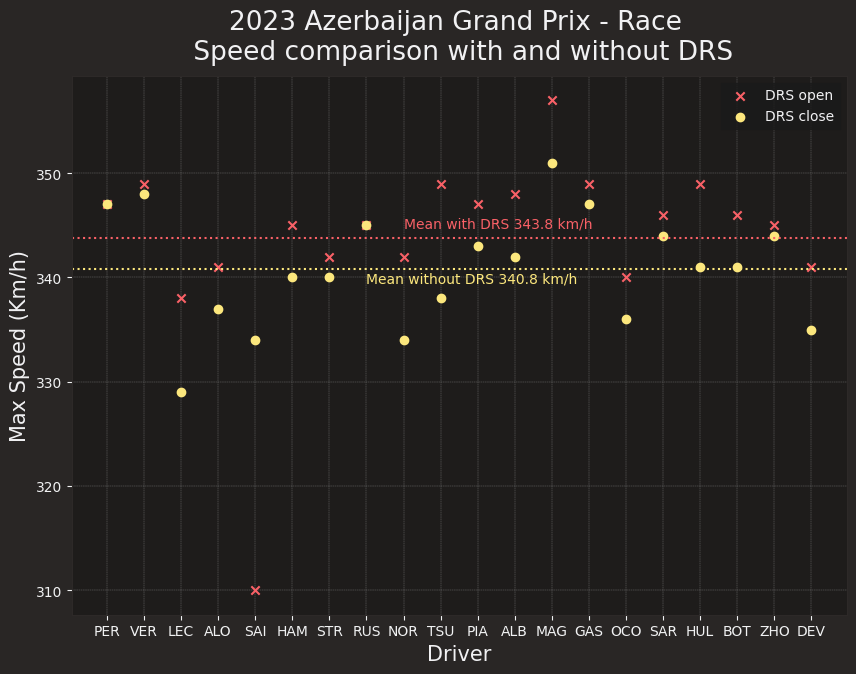

In [32]:
ff1.plotting.setup_mpl()
plt.figure(figsize=(10, 7))
plt.title(f"{fp.event.year} {fp.event.EventName} - {fp.name} \n Speed comparison with and without DRS")
plt.ylabel("Max Speed (Km/h)", fontsize=15)
plt.xlabel("Driver", fontsize = 15)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.3)
plt.scatter(max_speed_dict_drs.keys(), max_speed_dict_drs.values(), color='#F96167', marker='x', label="DRS open")
plt.axhline(y=(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs)), color='#F96167', linestyle=':')
plt.annotate("Mean with DRS " + f"{(sum(max_speed_dict_drs.values()) / len(max_speed_dict_drs))} km/h", xy=("NOR", (statistics.mean(list(max_speed_dict_drs.values())))+1), color='#F96167')
plt.scatter(max_speed_dict_no_drs.keys(), max_speed_dict_no_drs.values(), color='#FCE77D', marker='o', label="DRS close")
plt.axhline(y=(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs)), color='#FCE77D', linestyle=':')
plt.annotate("Mean without DRS " + f"{(sum(max_speed_dict_no_drs.values()) / len(max_speed_dict_no_drs))} km/h", xy=("RUS", (statistics.mean(list(max_speed_dict_no_drs.values())))-1.3), color='#FCE77D')
plt.legend()